#### Loan Approval Prediction

In [23]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [133]:
df = pd.read_csv("loan_pred_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [25]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [28]:
discrete_features = ['Dependents','Self_Employed','Credit_History','Loan_Amount_Term']

In [29]:
#Filling missing values of categorical features with mode()
for col in discrete_features:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [30]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Encode Categorical features

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [32]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
cat_features = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area','Loan_Status']

le = LabelEncoder()
for col in cat_features:
    df[col] = le.fit_transform(df[col])
    

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1,2,1
4,LP001013,1,1,0,1,0,2333,1516.0,95.0,8,1,2,1


Exploratory Data Analysis

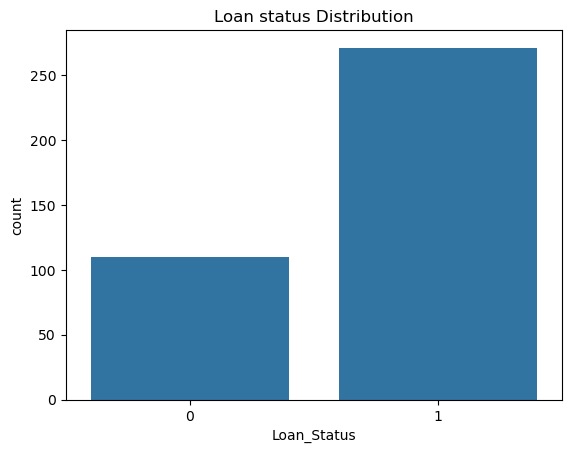

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot target variable
sns.countplot(data=df,x='Loan_Status')
plt.title("Loan status Distribution")
plt.show()

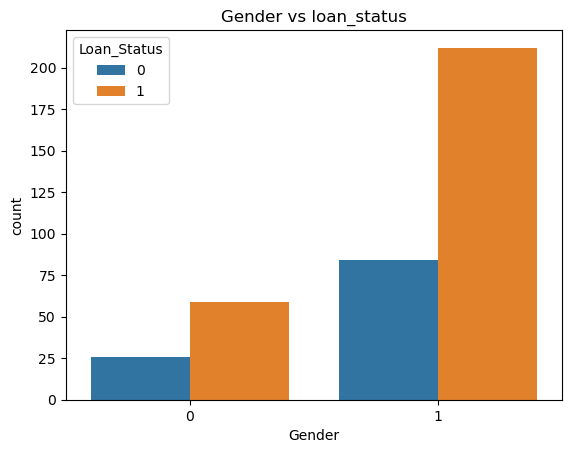

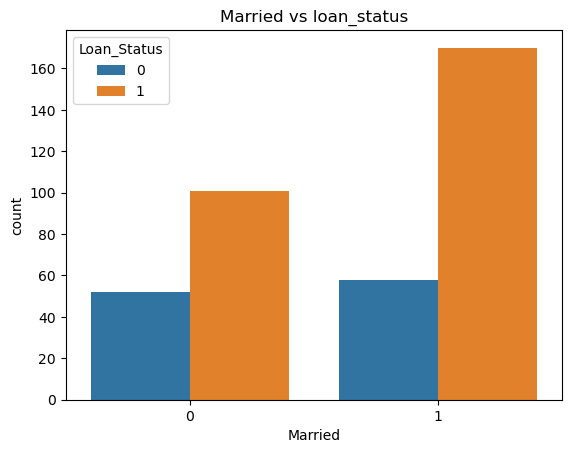

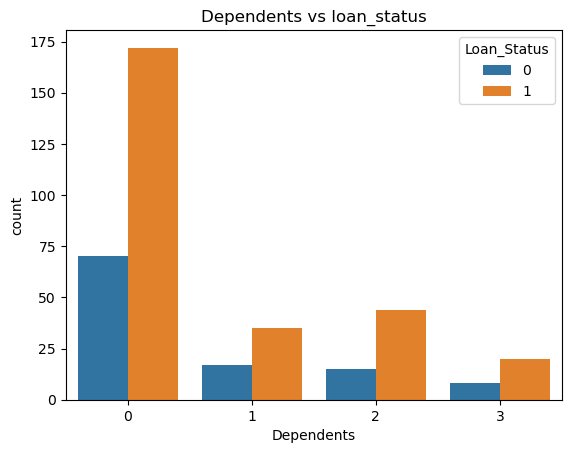

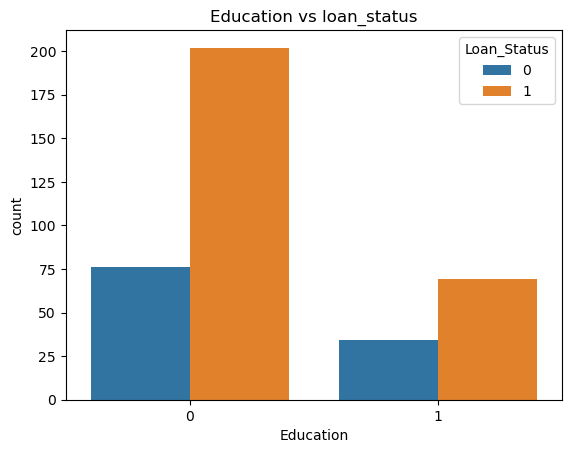

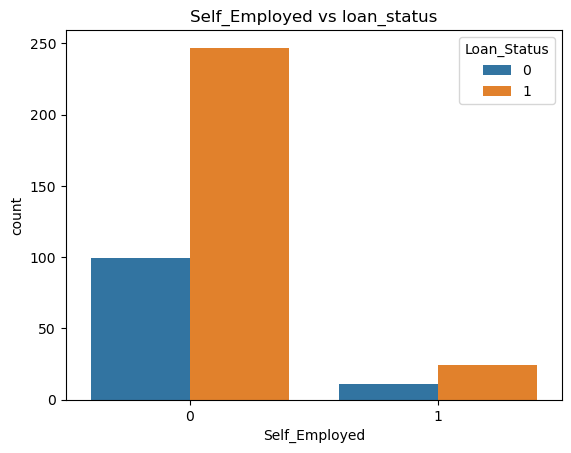

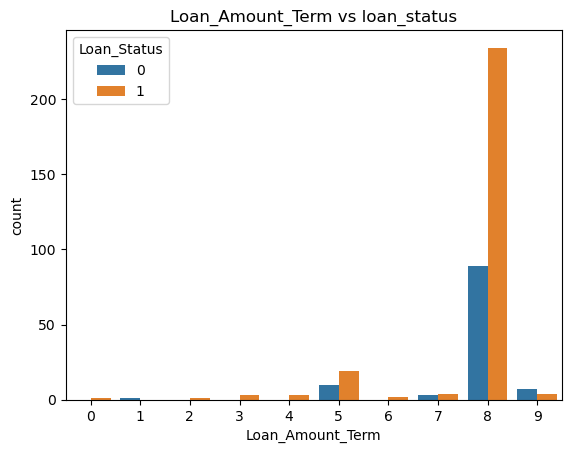

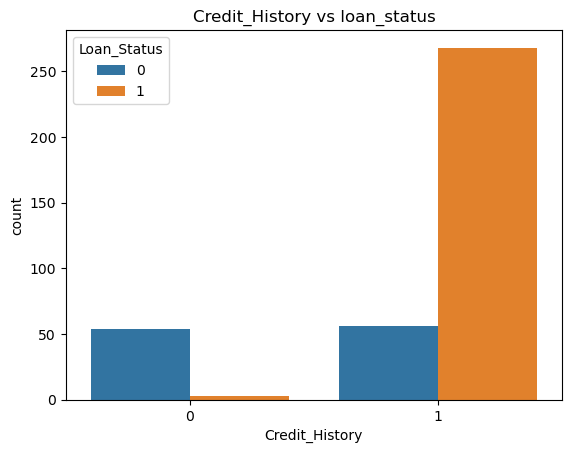

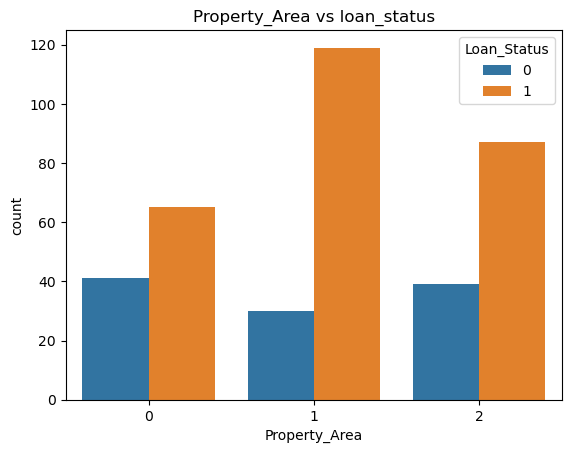

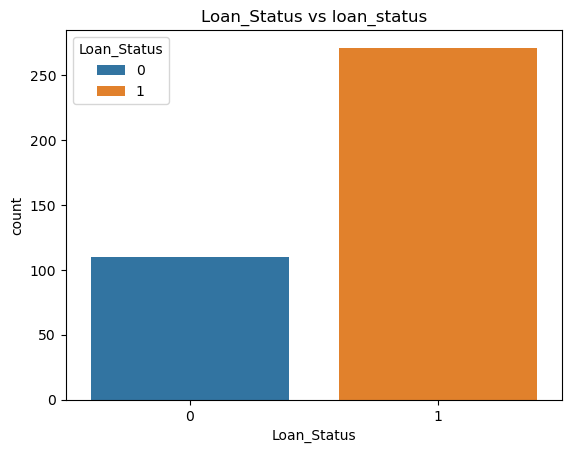

In [36]:
#plot categorical features against loan status
for col in cat_features:
    sns.countplot(x=col,hue='Loan_Status',data=df)
    plt.title(f'{col} vs loan_status')
    plt.show()

In [38]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1,2,1
4,LP001013,1,1,0,1,0,2333,1516.0,95.0,8,1,2,1


In [41]:
df.drop('Loan_ID',axis=1,inplace=True)

In [42]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
1,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
2,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1
3,1,0,0,0,0,6000,0.0,141.0,8,1,2,1
4,1,1,0,1,0,2333,1516.0,95.0,8,1,2,1


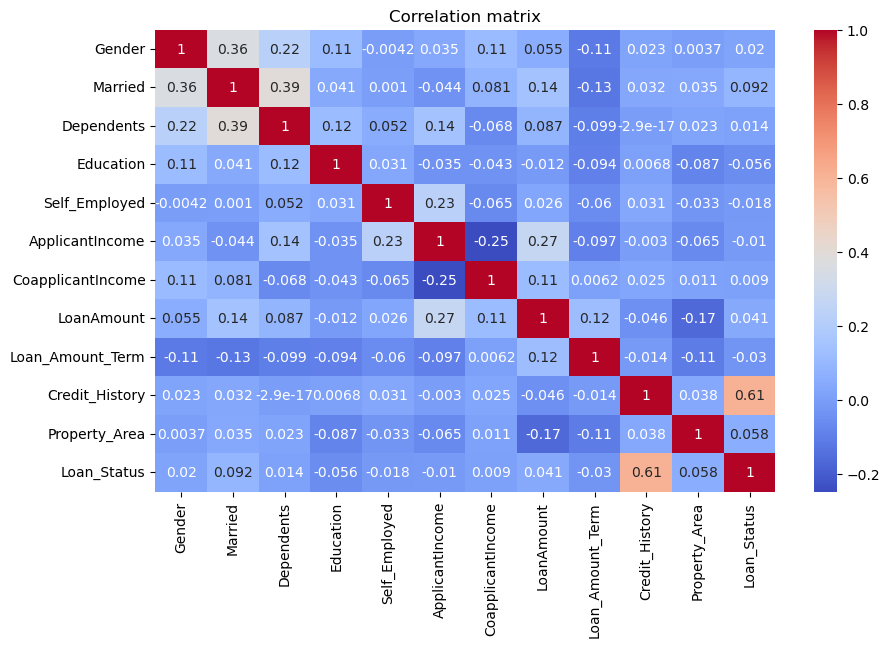

In [43]:
#correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

#### Feature scaling

In [45]:
from sklearn.preprocessing import StandardScaler
#split features in to x and y
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

#Standardize numerical columns
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
scaler = StandardScaler()
x[numeric_features] = scaler.fit_transform(x[numeric_features])



In [46]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
1,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
2,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1
3,1,0,0,0,0,6000,0.0,141.0,8,1,2,1
4,1,1,0,1,0,2333,1516.0,95.0,8,1,2,1


In [47]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
cat_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

Train test split

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

Model training & evaluation functions

In [54]:
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix,accuracy_score

def evaluate_model(model,x_test,y_test):
    y_pred = model.predict(x_test)
    print("Accuracy Score:",accuracy_score(y_test,y_pred))
    print("Precession:",precision_score(y_test,y_pred))
    print("Recall:",recall_score(y_test,y_pred))
    print("F1_Score:",f1_score(y_test,y_pred))
    print("Confusion Matrix:",confusion_matrix(y_test,y_pred))


model_1: Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
evaluate_model(lr,x_test,y_test)

Accuracy Score: 0.8181818181818182
Precession: 0.7704918032786885
Recall: 1.0
F1_Score: 0.8703703703703703
Confusion Matrix: [[16 14]
 [ 0 47]]


Model_2:Decision tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
evaluate_model(dt_clf,x_test,y_test)

Accuracy Score: 0.8051948051948052
Precession: 0.7962962962962963
Recall: 0.9148936170212766
F1_Score: 0.8514851485148515
Confusion Matrix: [[19 11]
 [ 4 43]]


Model_3:Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)
evaluate_model(rf_clf,x_test,y_test)

Accuracy Score: 0.8441558441558441
Precession: 0.7966101694915254
Recall: 1.0
F1_Score: 0.8867924528301887
Confusion Matrix: [[18 12]
 [ 0 47]]


In [65]:
import xgboost
print(xgboost.__version__)

2.1.4


model_4:xgboost

In [66]:
import xgboost as xg
xg_clf = xg.XGBClassifier()
xg_clf.fit(x_train,y_train)
print("XGBoost performance:")
evaluate_model(xg_clf,x_test,y_test)

XGBoost performance:
Accuracy Score: 0.8311688311688312
Precession: 0.8035714285714286
Recall: 0.9574468085106383
F1_Score: 0.8737864077669902
Confusion Matrix: [[19 11]
 [ 2 45]]


Cross validation scores >> cross_val_score

In [68]:
from sklearn.model_selection import cross_val_score

models = [lr,dt_clf,rf_clf,xg_clf]
model_names = ['Logistic Regression','Decision tree','Random Forest','xgboost']

for model,name in zip(models,model_names):
    cv_score = cross_val_score(model,x,y,cv=5,scoring='accuracy')
    print(f'{name} - CV Mean accuracy:{cv_score.mean():.4f}')

Logistic Regression - CV Mean accuracy:0.8451
Decision tree - CV Mean accuracy:0.7822
Random Forest - CV Mean accuracy:0.8241
xgboost - CV Mean accuracy:0.8032


Cross validation scores >> stratified_k fold

In [75]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

models = [lr,dt_clf,rf_clf,xg_clf]
model_names = ['Logistic Regression','Decision tree','Random Forest','xgboost']

for model,name in zip(models,model_names):
    sk_score = cross_val_score(model,x,y,cv=skf,scoring='accuracy')
    print(f'{name} - CV Mean accuracy:{sk_score.mean():.4f}')


Logistic Regression - CV Mean accuracy:0.8425
Decision tree - CV Mean accuracy:0.7874
Random Forest - CV Mean accuracy:0.8398
xgboost - CV Mean accuracy:0.7953


#### Hyperparameter tuning >> Random Forest

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [50,100,200],
             'max_depth':[None,4,6],
             'min_samples_split':[2,5]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=3,scoring='accuracy')
grid_rf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 4, 6], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [110]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=50, random_state=42)

In [111]:
grid_rf.best_score_

np.float64(0.8518410664595871)

In [94]:
best_rf_model = grid_rf.best_estimator_

In [95]:
evaluate_model(best_rf_model,x_test,y_test)

Accuracy Score: 0.8181818181818182
Precession: 0.7704918032786885
Recall: 1.0
F1_Score: 0.8703703703703703
Confusion Matrix: [[16 14]
 [ 0 47]]


#### Hyperparameter tuning >> Logistic regression

In [106]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {'C':[0.01,0.1,1,10],
                'solver':['liblinear','lbfgs']}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000),param_grid_lr,cv=5,scoring='accuracy')
grid_lr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [107]:
grid_lr.best_estimator_

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [108]:
grid_lr.best_score_

np.float64(0.8516939890710382)

#### Hyperparameter tuning >> xgboost

In [99]:
from xgboost import XGBClassifier

In [103]:
param_grid_xgb = {'n_estimators':[100,200],
                 'max_depth':[3,5,7],
                 'learning_rate':[0.01,0.1,0.2],
                 'subsample':[0.8,1]}
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42),param_grid_xgb,cv=3,scoring='accuracy')
grid_xgb.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='accuracy')

In [104]:
grid_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [105]:
grid_xgb.best_score_

np.float64(0.8518410664595871)

#### Save the best model

In [113]:
import joblib
best_rf_model = grid_rf.best_estimator_
joblib.dump(best_rf_model,'loan_approval_rf_model.pkl')
print("Model saved as loan_approval_rf_model.pkl")

Model saved as loan_approval_rf_model.pkl


#### plot ROC Curve

In [114]:
from sklearn.metrics import roc_curve,auc

In [116]:
#Load saved model
model = joblib.load('loan_approval_rf_model.pkl')

In [118]:
#predict probabilities
y_proba = model.predict_proba(x_test)[:,1]

In [119]:
#calculate ROC curve values
fpr,tpr,thresholds = roc_curve(y_test,y_proba)
roc_auc = auc(fpr,tpr)

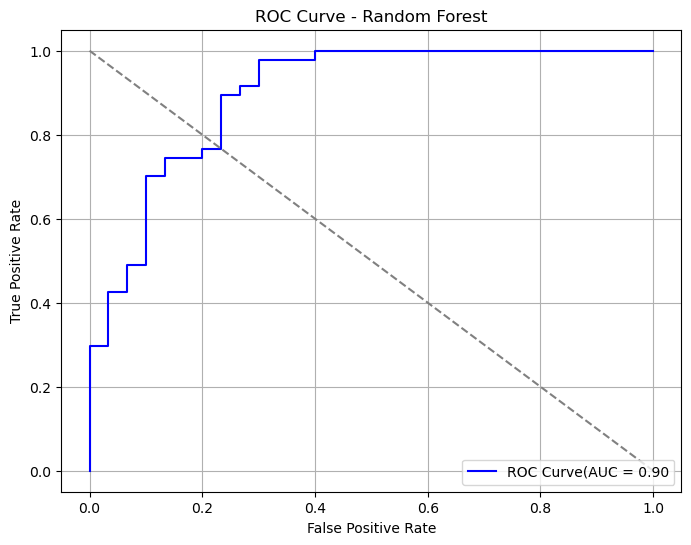

In [120]:
#plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='blue',label=f'ROC Curve(AUC = {roc_auc:.2f}')
plt.plot([0,1],[1,0],color='gray',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()